In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
# Declare the credentials
client_id = 'a6ef729f004748cabd5a6ba6d39bcdee'
client_secret = '2372e911c0df4c4ebe52ffa08f59e147'
redirect_uri='http://localhost:7777/callback'
username = 'ethan.falcao'

In [3]:
# Authorization flow
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [4]:
# Getting features for each song
def fetch_audio_features(sp, df):
    playlist = df[['track_id','track_name']] 
    index = 0
    audio_features = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 70, 0])
        index += 70
    
    # Create an empty list to feed in different charactieritcs of the tracks
    features_list = []
    #Create keys-values of empty lists inside nested dictionary for album
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['acousticness'],
                              features['energy'], 
                              features['tempo'],
                              features['instrumentalness'], 
                              features['loudness'],
                              features['liveness'],
                              features['duration_ms'],
                              features['key'],
                              features['valence'],
                              features['speechiness'],
                              features['mode']
                             ])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'acousticness', 'energy','tempo', 
                                                             'instrumentalness', 'loudness', 'liveness','duration_ms', 'key',
                                                             'valence', 'speechiness', 'mode'])
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_name', inplace=True, drop=True)
    return df_playlist_audio_features

In [5]:
# # Getting playlist IDs from each of Spotify's playlists
playlists = sp.user_playlists('spotify')
spotify_playlist_ids = []
while playlists:
    for i, playlist in enumerate(playlists['items']):
        spotify_playlist_ids.append(playlist['uri'][-22:])
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None
spotify_playlist_ids[:5]
#change 5 to 20

['37i9dQZF1DXcBWIGoYBM5M',
 '37i9dQZF1DX0XUsuxWHRQd',
 '37i9dQZF1DX1lVhptIYRda',
 '37i9dQZF1DX10zKzsJ2jva',
 '37i9dQZF1DX4JAvHpjipBk']

In [6]:
len(spotify_playlist_ids)

1112

In [7]:
#Getting tracks from Spotify playlists
# Creating a function to get the first 50 tracks IDs from a playlist
#def getTrackIDs(playlist_id):
 #   playlist = sp.user_playlist('spotify', playlist_id)
 #   for item in playlist['tracks']['items'][:50]:
 #       track = item['track']
 #       ids.append(track['id'])
 #   return
 


In [8]:
# Creating a function get features of each track from track id
def getTrackFeatures(track_id):
  meta = sp.track(track_id)
  features = sp.audio_features(track_id)

  # meta
  track_id = track_id
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']

  track = [track_id, name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
  return track

In [9]:
#Getting tracks from Spotify playlists
# Creating a function to get the first 50 tracks IDs from a playlist
def getTrackIDs(playlist_id):
    try:
        playlist = sp.playlist(playlist_id)
        for item in playlist['tracks']['items'][:50]:
            track = item['track']
            ids.append(track['id'])
    except Exception as e:
        print(f"Error fetching playlist {playlist_id}: {e}")


In [10]:
# %%time
# # Gathering track ids
ids = []
for x in spotify_playlist_ids[:50]:
    getTrackIDs(x)
ids[:5]
#change 50 to 200

['2IGMVunIBsBLtEQyoI1Mu7',
 '1BxfuPKGuaTgP7aM0Bbdwr',
 '4KULAymBBJcPRpk1yO4dOG',
 '3IX0yuEVvDbnqUwMBB3ouC',
 '5mjYQaktjmjcMKcUIcqz4s']

In [11]:
# %%time
 # loop over track ids to get audio features for each track
tracks = []
for i in range(len(ids)):
    try:  
        track = getTrackFeatures(ids[i])
        tracks.append(track)
    except:
        pass

 # create dataset
df = pd.DataFrame(tracks, columns = ['track_id', 'name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df.head()

Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached


,track_id,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,Paint The Town Red,Doja Cat,2023-08-04,231750,100,0.868,0.26900,0.538,0.000003,0.0901,-8.603,0.1740,99.968,4
1,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Lover,Taylor Swift,2019-08-23,178426,98,0.552,0.11700,0.702,0.000021,0.1050,-5.707,0.1570,169.994,4
2,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),Zach Bryan,Zach Bryan,2023-08-25,227195,91,0.429,0.55400,0.453,0.000002,0.1020,-7.746,0.0459,77.639,4
3,3IX0yuEVvDbnqUwMBB3ouC,bad idea right?,GUTS,Olivia Rodrigo,2023-09-08,184783,91,0.627,0.00193,0.879,0.000007,0.0647,-3.446,0.0955,129.979,4
4,5mjYQaktjmjcMKcUIcqz4s,Strangers,Strangers,Kenya Grace,2023-09-01,172964,91,0.628,0.70100,0.523,0.002740,0.2190,-8.307,0.0946,169.982,4


In [ ]:
# Dropping duplicated songs
df = df.drop_duplicates(subset=['track_id'])
df['track_id'].value_counts()

track_id
2IGMVunIBsBLtEQyoI1Mu7    1
1pxzWiOrRbpXQkk4n0HRs3    1
7mXuWTczZNxG5EDcjFEuJR    1
4yKZACkuudvfd600H2dQie    1
4knQpcVbbWsFPIa6qBzTV0    1
Name: count, dtype: int64

In [13]:
len(df)

2002

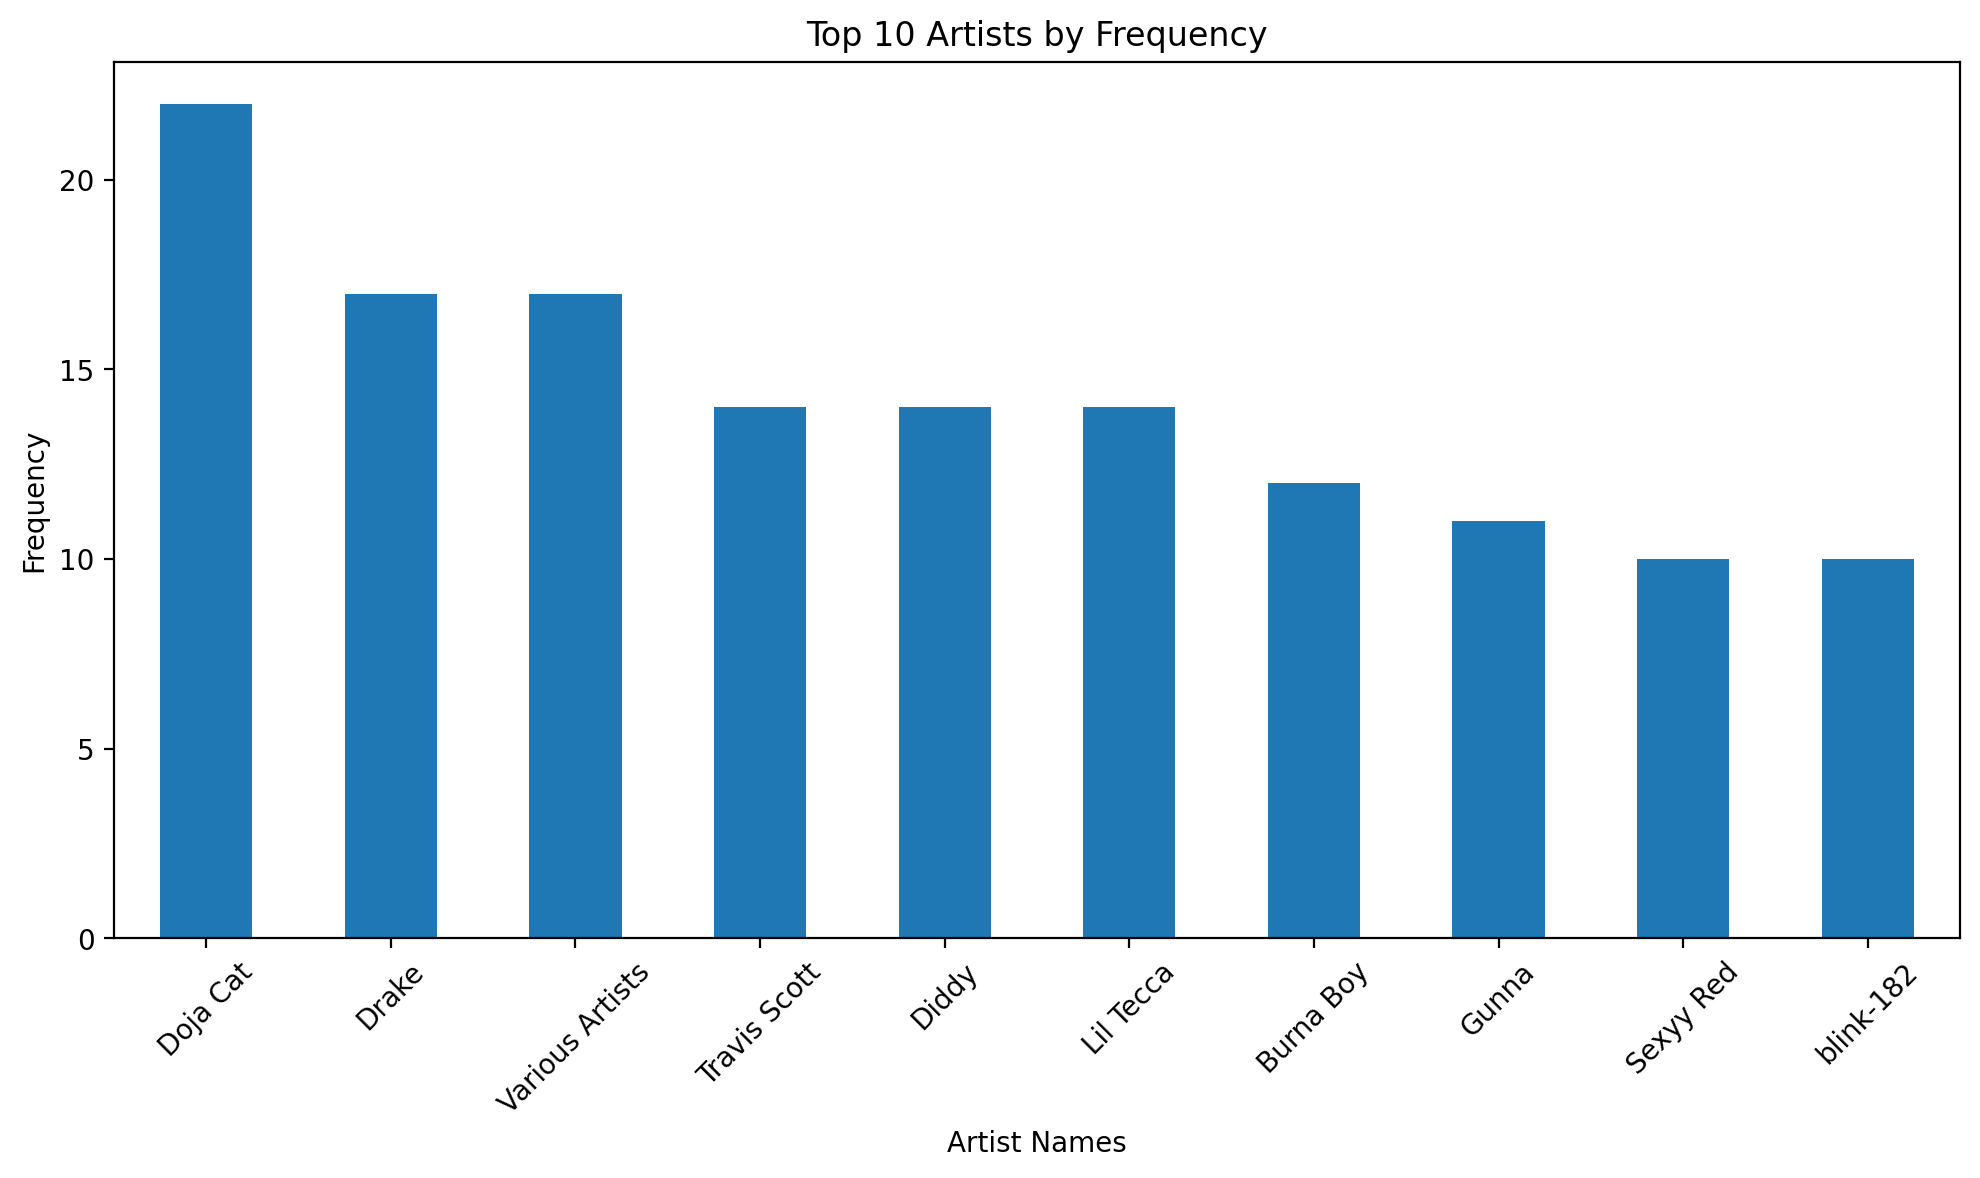

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame called 'df'

# Get the top 10 artists based on their frequency
top_10_artists = df['artist'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.xlabel('Artist Names')
plt.ylabel('Frequency')
plt.title('Top 10 Artists by Frequency')
plt.tight_layout()
plt.show()

In [39]:
# Getting top 50 tracks from user
results = sp.current_user_top_tracks(limit=1000, offset=0,time_range='short_term')
results_1 = sp.current_user_top_tracks(limit=1000, offset=0,time_range='medium_term')
results_2 = sp.current_user_top_tracks(limit=1000, offset=0,time_range='long_term')

#https://github.com/lognorman20/spotify_recommender/blob/main/data_engineering.ipynb

In [33]:
import pandas as pd

def create_track_dataframe(results):
    track_name = []
    track_id = []
    artist = []
    album = []
    duration = []
    popularity = []
    
    for i, items in enumerate(results['items']):
        track_name.append(items['name'])
        track_id.append(items['id'])
        artist.append(items["artists"][0]["name"])
        duration.append(items["duration_ms"])
        album.append(items["album"]["name"])
        popularity.append(items["popularity"])

    df_favourite = pd.DataFrame({
        "track_name": track_name,
        "album": album,
        "track_id": track_id,
        "artist": artist,
        "duration": duration,
        "popularity": popularity
    })

    return df_favourite

# Example usage:
# Assuming you have your 'results' dictionary
# df = create_track_dataframe(results)
# df.head()


In [34]:
short_term = create_track_dataframe(results)

In [35]:
medium_term=create_track_dataframe(results_1)

In [40]:
long_term = create_track_dataframe(results_2)

In [42]:
long_term.head()

,track_name,album,track_id,artist,duration,popularity
0,Bad Boy (with Young Thug),Bad Boy (with Young Thug),43CIWpJaJHRcI4mUSjqgc2,Juice WRLD,157355,68
1,4U,4U,0G2OvqpvifsIHALlLqB5NG,Pi’erre Bourne,218000,43
2,Minute,Perfect Timing,3JWh19WsndEFg0UFRFeTiU,NAV,265373,62
3,Guillotine,The Life Of Pi'erre 4,7491l7CnemDkYH0jsoLvYr,Pi’erre Bourne,179890,53
4,Off The Map,After Me,6GNG0YQixWuLE0M5FtrRxY,SoFaygo,141582,57


In [46]:
%%time
# Getting track features for each song in favorite song dataframe
fav_tracks = []
for track in short_term['track_id']:
    try:  
        track = getTrackFeatures(track)
        fav_tracks.append(track)
    except:
        pass

Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached


CPU times: total: 422 ms
Wall time: 1min 58s


In [47]:
# Create favorite track wtih audio features dataset
df_fav = pd.DataFrame(fav_tracks, columns = ['track_id', 'name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df_fav.head()

,track_id,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="a76bfd98001a4aff8bd958ea948403e1",
                                               client_secret="2545a1f2c3864049a42ff28637c3db70",
                                               redirect_uri="http://localhost:7777/callback",
                                               scope="user-library-read"))

results = sp.current_user_saved_tracks()
for idx, item in enumerate(results['items']):
    
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

0 Gunna  –  Outstanding
1 Gunna  –  One Call
2 Lil Uzi Vert  –  Patience (feat. Don Toliver)
3 NAV  –  Tap (feat. Meek Mill)
4 SBTRKT  –  FORWARD
5 KayCyy  –  Look What I Found (feat. Lancey Foux)
6 Wegz  –  Keify Keda
7 Dom Corleo  –  Wake Up
8 NAV  –  Ain't Goin Back
9 NAV  –  Yessir
10 NAV  –  Relax
11 NAV  –  Free Santana (feat. Lil Duke)
12 Drake  –  Down Hill
13 Drake  –  Flight's Booked
14 Drake  –  Tie That Binds
15 Drake  –  Texts Go Green
16 Drake  –  A Keeper
17 Drake  –  Calling My Name
18 BlackMayo  –  Jus Know, Pt. 4
19 Kanye West  –  Mercy


In [6]:
# Fetch the top-50 songs of the user
if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_top_tracks(limit=50,offset=0,time_range='medium_term')
    for song in range(50):
        list = []
        list.append(results)
        with open('top50_data.json', 'w', encoding='utf-8') as f:
            json.dump(list, f, ensure_ascii=False, indent=4)
else:
    print("Can't get token for", username)

In [8]:
# Open the JSON file to Python objects
with open('top50_data.json') as f:
  data = json.load(f)

In [9]:
len(data[0]['items'])

50

In [10]:
list_of_results = data[0]["items"]
list_of_artist_names = []
list_of_artist_uri = []
list_of_song_names = []
list_of_song_uri = []
list_of_durations_ms = []
list_of_explicit = []
list_of_albums = []
list_of_popularity = []

for result in list_of_results:
    result["album"]
    this_artists_name = result["artists"][0]["name"]
    list_of_artist_names.append(this_artists_name)
    this_artists_uri = result["artists"][0]["uri"]
    list_of_artist_uri.append(this_artists_uri)
    list_of_songs = result["name"]
    list_of_song_names.append(list_of_songs)
    song_uri = result["uri"]
    list_of_song_uri.append(song_uri)
    list_of_duration = result["duration_ms"]
    list_of_durations_ms.append(list_of_duration)
    song_explicit = result["explicit"]
    list_of_explicit.append(song_explicit)
    this_album = result["album"]["name"]
    list_of_albums.append(this_album)
    song_popularity = result["popularity"]
    list_of_popularity.append(song_popularity)

In [11]:
# Convert the pulled content to a pandas df
all_songs = pd.DataFrame(
    {'artist': list_of_artist_names,
     'artist_uri': list_of_artist_uri,
     'song': list_of_song_names,
     'song_uri': list_of_song_uri,
     'duration_ms': list_of_durations_ms,
     'explicit': list_of_explicit,
     'album': list_of_albums,
     'popularity': list_of_popularity
     
    })

In [28]:
all_songs.sort_values('popularity', ascending=False)

NameError: name 'all_songs' is not defined

In [4]:
import requests
import base64

# Define the authentication options
auth_url = 'https://accounts.spotify.com/api/token'
auth_headers = {
    'Authorization': 'Basic ' + base64.b64encode(f'{client_id}:{client_secret}'.encode()).decode()
}
auth_data = {
    'grant_type': 'client_credentials'
}
# Make the POST request
response = requests.post(auth_url, headers=auth_headers, data=auth_data)

if response.status_code == 200:
    token = response.json().get('access_token')
    print(f'Token: {token}')
else:
    print(f'Error: {response.status_code} - {response.text}')


Token: BQA9Mzdg4TAbPjVKiFZygHRE-P-5ZwT6all09bSIj7QCjtSta-fZLWsj8SGwQZLkPKTgvgpyC_E12dLSIN5sU1PzPDC26K5eRRM_4amPy4W8EZUIff8
